In [5]:
import pandas as pd
import sys
import os

# Add the scripts directory to the Python path
sys.path.append(os.path.abspath('../scripts'))

In [12]:
import pandas as pd

# Correcting the typo in the function name and specifying the correct path
data = pd.read_csv("../data/Copy of BrentOilPrices.csv")  # Use the correct function name
data['Date'] = pd.to_datetime(data['Date'])

# Display the first few rows of the DataFrame
print(data.head())


C:\Users\Naim\AppData\Local\Temp\ipykernel_20040\775095739.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63


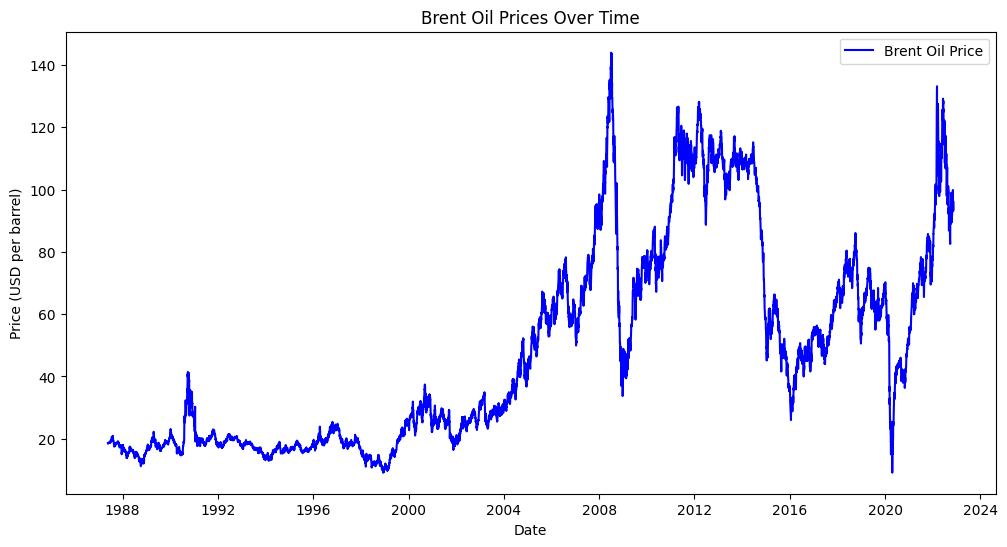

In [13]:
import matplotlib.pyplot as plt

# Plotting the Brent oil prices over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Price'], label='Brent Oil Price', color='blue')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()


In [14]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(data['Price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287


<Figure size 1200x600 with 0 Axes>

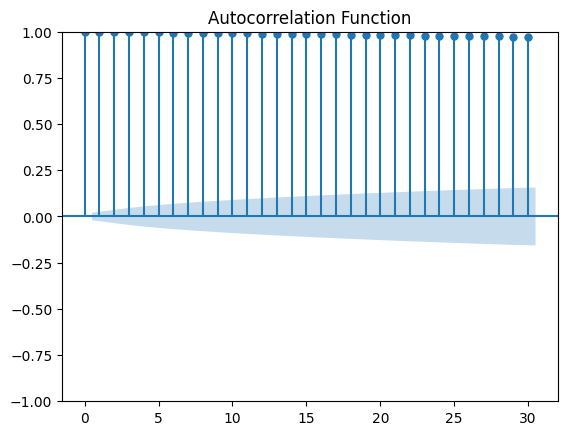

<Figure size 1200x600 with 0 Axes>

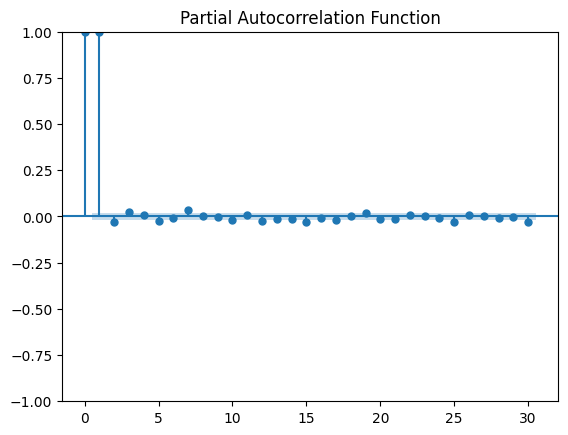

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(12, 6))
plot_acf(data['Price'], lags=30)
plt.title('Autocorrelation Function')
plt.show()

plt.figure(figsize=(12, 6))
plot_pacf(data['Price'], lags=30)
plt.title('Partial Autocorrelation Function')
plt.show()


In [17]:
from statsmodels.tsa.arima.model import ARIMA

# Define the model
model = ARIMA(data['Price'], order=(1, 1, 1))  # Replace p, d, q with chosen values
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -14543.950
Date:                Mon, 04 Nov 2024   AIC                          29093.899
Time:                        12:13:06   BIC                          29115.218
Sample:                             0   HQIC                         29101.153
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3427      0.159     -2.152      0.031      -0.655      -0.031
ma.L1          0.3712      0.157      2.358      0.018       0.063       0.680
sigma2         1.4777      0.008    184.571      0.0